# Q1: Coin Machine

### The function

In [1]:
def coin_change(value):
    # Define the list of coins available for change
    coins = [200, 100, 50, 20, 10, 5, 2, 1]
    
    # Split the value into pound and pence and convert them to int
    pound, pence = value.split("-")
    pound = int(pound[1:]) * 100
    pence = int(pence) if pence else 0
    
    # Calculate the total money in pence
    money = pound + pence
    
    # Initialize the count list and combinations list
    count = [0] * (money + 1)
    count[0] = 1
    combinations = [[] for i in range(money + 1)]
    combinations[0].append([])
    
    # Loop through the list of coins
    for i in range(len(coins)):
        # Loop through the money starting from the value of the current coin
        for j in range(coins[i], money + 1):
            # Update the count for the new combination
            count[j] += count[j - coins[i]]
            # If a combination is possible, add the current coin to the list
            if count[j - coins[i]] != 0:
                for k in range(count[j - coins[i]]):
                    combinations[j].append(combinations[j - coins[i]][k] + [coins[i]])
    
    # Count the number of combinations with odd number of coins
    odd_count = 0
    for combination in combinations[money]:
        if len(combination) % 2 != 0:
            odd_count += 1
    
    # Return the number of combinations with odd number of coins
    return odd_count


### Test Case

In [2]:
#test cases
print(coin_change("£0-5")) #3
print(coin_change("£0-50"))#225
print(coin_change("£2-"))  #36840

3
225
36840


In [ ]:
print(coin_change("£10-")) 

In [ ]:
#print(coin_change("£100-0")) 

# Q2: Price breakout detection

### Load packages

In [4]:
import matplotlib.pyplot as plt
import mpl_finance as mpf
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc

### Load Price data

In [5]:
df = pd.read_pickle('/Users/imasha/Documents/OilData/PriceData.pickle')

In [6]:
df

Time
2022-01-02 23:00:00     78.184563
2022-01-02 23:01:00     78.259333
2022-01-02 23:02:00     78.251260
2022-01-02 23:03:00     78.172424
2022-01-02 23:04:00     78.197308
                          ...    
2022-07-15 22:21:00    100.990000
2022-07-15 22:22:00    100.990000
2022-07-15 22:24:00    101.100000
2022-07-15 22:37:00    101.130000
2022-07-15 22:58:00    101.130000
Length: 169630, dtype: float64

### Function to create Candlestick Chart

In [7]:
def get_candlestick_chart(begin, end, frequency):
    # Read the pickle file containing the price data
    df = pd.read_pickle('/Users/imasha/Documents/OilData/PriceData.pickle')
    
    # Convert the data into a pandas DataFrame
    df = pd.DataFrame({'Time':df.index, 'Values':df.values})
    
    # Convert the time column to datetime format
    df['Time'] = pd.to_datetime(df['Time'])
    
    # Set the time column as the index. Filter the data between the specified begin and end dates. Resample the data based on the specified frequency  
    df = df.set_index('Time').loc[begin:end].resample(frequency).ohlc()
    
    # Reset the index to make the time column a normal column again
    df.reset_index(inplace=True)
    
    # Set the style of the plot
    plt.style.use('dark_background')
    
    # Create a figure and axis object
    fig, ax = plt.subplots()
    
    # Set the x axis to be interpreted as dates
    ax.xaxis_date()
    
    # Set the x axis ticks to be rotated by 45 degrees
    plt.xticks(rotation=45)
    
    # Set the y axis label and title
    plt.ylabel("Values", fontsize=14, color='white')
    plt.title("Candlestick Chart", fontsize=20, color='white')
    
    # Show the grid in the plot
    plt.grid(True, color='grey')
    
    # Convert the time column to matplotlib date format
    df['Time'] = df['Time'].apply(mdates.date2num)
    
    # Plot the candlestick chart
    candlestick_ohlc(ax, df.to_numpy(), width=0.6, colorup='b', colordown='r', alpha=0.75)
    
    # Tighten the layout of the plot
    plt.tight_layout()
    
    # Set the x axis limit based on the start and end dates
    plt.xlim(df['Time'].iloc[0], df['Time'].iloc[-1])
    
    # Show the plot
    plt.show()

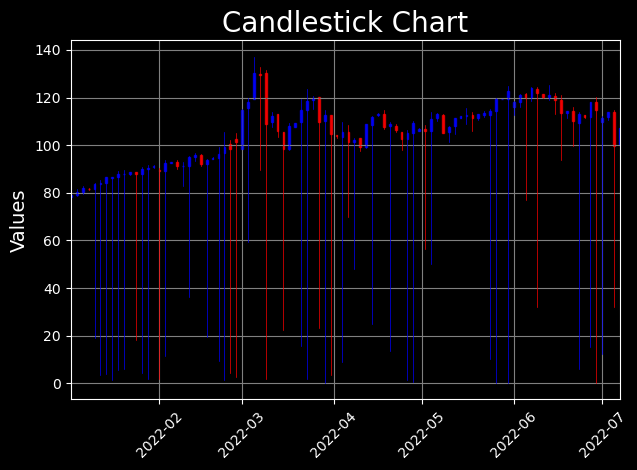

In [8]:
get_candlestick_chart("2022-01-02 23:00:00", "2022-07-10 00:00:00", "48H")

This function takes a dataframe, the start and end times for the data you want to visualize, and the desired frequency for resampling as inputs, and creates a candlestick plot using the candlestick_ohlc function from the matplotlib library. The code first creates a DataFrame with columns 'Time' and 'Values' from the input dataframe, and converts the 'Time' column to a datetime format. It then sets the 'Time' column as the index, subsets the data based on the input start and end times, and resamples the data to the desired frequency. Finally, the candlestick plot is created and displayed using the candlestick_ohlc function.

### Function to detect signal of break out

In [15]:
def detect_breakout(begin, end, frequency, plot_chart=False):
    # Load the price data from the pickle file and convert it to a Pandas DataFrame
    df = pd.read_pickle('/Users/imasha/Documents/OilData/PriceData.pickle')
    df = pd.DataFrame({'Time':df.index, 'Values':df.values})
    
    # Convert the time column to datetime format
    df['Time'] = pd.to_datetime(df['Time'])
    
    # Set the time column as the index and resample the data to the desired frequency (daily, weekly, monthly, etc.)
    df = df.set_index('Time').loc[begin:end].resample(frequency).ohlc()
    
    # Reset the index of the DataFrame
    df.reset_index(inplace=True)
    
    # Initialize a new column "Breakout"
    df['Breakout'] = ''
    
    # Determine the trend (uptrend, downtrend, or breakout) based on the high and low values
    df['Breakout'] = np.where((df[('Values',  'high')] > df[('Values',  'high')].shift(1)) & (df[('Values',  'low')] > df[('Values',  'low')].shift(1)), 'Uptrend', df['Breakout'])
    df['Breakout'] = np.where((df[('Values',  'high')] < df[('Values',  'high')].shift(1)) & (df[('Values',  'low')] < df[('Values',  'low')].shift(1)), 'Downtrend', df['Breakout'])
    df['Breakout'] = np.where((df[('Values',  'high')] > df[('Values',  'high')].shift(1)) & (df[('Values',  'low')] < df[('Values',  'low')].shift(1)), 'Breakout', df['Breakout'])
    df['Breakout'] = np.where((df[('Values',  'high')] < df[('Values',  'high')].shift(1)) & (df[('Values',  'low')] > df[('Values',  'low')].shift(1)), 'Breakout', df['Breakout'])

    # Store the data points where the trend is a breakout
    signals = df.loc[df['Breakout'] == 'Breakout']
    
    # Plot the chart with breakout signals (if requested)
    if plot_chart:
        plt.style.use('dark_background')
        fig, ax = plt.subplots()
        # Set the x-axis to display dates
        ax.xaxis_date()
        # Rotate the x-tick labels for readability
        plt.xticks(rotation=45)
        plt.ylabel("Values", fontsize=14, color='white')
        plt.title("Candlestick Chart with Breakout Signals", fontsize=20, color='white')
        # Display gridlines
        plt.grid(True, color='grey')
        # Convert the time column to numerical format for plotting
        df['Time'] = df['Time'].apply(mdates.date2num)
        candlestick_ohlc(ax, df.to_numpy(), width=0.6, colorup='b', colordown='r', alpha=0.75)
        for signal in signals.iterrows():
            ax.annotate('Breakout', xy=(signal[1]['Time'], signal[1][('Values',  'high')]), xytext=(signal[1]['Time'], signal[1][('Values',  'high')] + 20),
                        arrowprops=dict(facecolor='red', shrink=0.2), fontsize = 6,
                        ha='center', va='bottom', rotation=45
                        )
        plt.tight_layout()
        plt.xlim(df['Time'].iloc[0], df['Time'].iloc[-1])
        #plt.ylim(df['low'].min()-10, df['high'].max()+10)
        plt.show()
    return signals

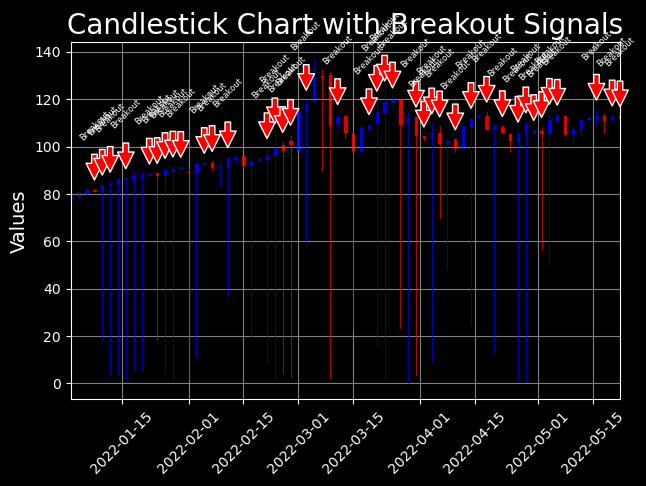

Time      Values                                      Breakout
                     open        high         low       close          
3  2022-01-08   81.820000   81.924722   81.270000   81.470000  Breakout
4  2022-01-10   81.455217   83.964592   19.020733   83.750000  Breakout
5  2022-01-12   83.803594   85.196409    3.682954   84.102000  Breakout
7  2022-01-16   86.390000   86.685000    1.617944   86.540000  Breakout
10 2022-01-22   88.000000   88.646667   87.657895   88.646667  Breakout
11 2022-01-24   88.652013   88.893594   18.364254   88.080000  Breakout
12 2022-01-26   88.050000   91.017432    4.564383   90.063333  Breakout
13 2022-01-28   89.853913   91.624040    1.916737   90.577500  Breakout
14 2022-01-30   90.870000   91.480833   90.605833   91.277308  Breakout
17 2022-02-05   92.580000   93.142515   92.522035   92.940000  Breakout
18 2022-02-07   92.923077   93.979139   89.974284   91.320000  Breakout
20 2022-02-11   91.240000   95.525471   36.475243   95.125000  Breakout
25 2022-02-21   94.751212   99.393931    9.197900   96.500000  Breakout
26 2022-02-23   96.628551  105.663729    1.291951   99.430000  Breakout
27 2022-02-25  100.500000  101.987838    4.575349   98.480000  Breakout
28 2022-02-27  102.488750  105.029474    2.653149  101.300000  Breakout
30 2022-03-03  115.500000  119.754311   59.155531  118.026000  Breakout
34 2022-03-11  109.850000  113.781864  107.460178  112.330000  Breakout
38 2022-03-19  107.500000  109.494615  107.500000  109.310000  Breakout
39 2022-03-21  109.847091  119.390821   15.662390  114.650000  Breakout
40 2022-03-23  114.573834  123.689444    1.791346  118.710000  Breakout
41 2022-03-25  118.822000  120.791082  115.334133  119.980000  Breakout
44 2022-03-31  112.681875  112.681875    3.432131  104.750000  Breakout
45 2022-04-02  104.300000  104.300000  102.973134  103.670000  Breakout
46 2022-04-04  103.642000  109.848848    8.785810  105.645556  Breakout
47 2022-04-06  105.580585  108.578602   69.784397  101.410000  Breakout
49 2022-04-10  103.110000  103.110000   97.743236   99.346000  Breakout
51 2022-04-14  108.410000  112.147838   24.752630  111.660000  Breakout
53 2022-04-18  112.953556  114.773377  106.843979  107.600000  Breakout
55 2022-04-22  108.250000  108.705000  105.560444  106.200000  Breakout
57 2022-04-26  102.546875  106.329455    1.380082  105.250000  Breakout
58 2022-04-28  105.126486  110.288437    0.434988  109.400000  Breakout
59 2022-04-30  105.873878  107.051818  105.828557  106.763056  Breakout
60 2022-05-02  106.769000  108.324722   56.391148  105.940000  Breakout
61 2022-05-04  105.891146  113.903165   50.141917  111.057143  Breakout
62 2022-05-06  111.305269  113.494440  109.985223  113.220000  Breakout
67 2022-05-16  112.227500  115.626190  109.047000  112.727059  Breakout
69 2022-05-20  111.570000  113.211765  110.603981  112.910000  Breakout
70 2022-05-22  112.825673  112.825673  112.002857  112.147143  Breakout

In [16]:
detect_breakout("2022-01-02 23:00:00", "2022-05-23 00:00:00", "48H", plot_chart=True)

This function detects breakouts in oil price data using the resampled ohlc data of the oil prices. 

It first reads the pickle file containing the oil price data, converts the date format and sets it as the index. 

The data is then filtered between the given begin and end dates. 

The data is then resampled based on the given frequency to create ohlc data. 

A column named 'Breakout' is added to the dataframe to store the breakout signals.

The breakout signals are determined by comparing the current high and low values to the previous high and low values.

If the current high value is greater than the previous high value and the current low value is greater than the previous low value, it is considered as an uptrend. 

If the current high value is less than the previous high value and the current low value is less than the previous low value, it is considered as a downtrend. 

If the current high value is greater than the previous high value and the current low value is less than the previous low value, it is considered as a breakout. 

Similarly, if the current high value is less than the previous high value and the current low value is greater than the previous low value, it is also considered as a breakout. 

The signals are filtered from the dataframe and stored in the signals variable. If the plot_chart flag is set to True, a candlestick chart with the breakout signals annotated will be plotted. Finally, the signals variable is returned.

# Q2 (Option 2) Energy Demand Forecast 

## Note: I attempted this not realising this was an optional question and due to lack of time I did not complete, however below is my attempt at the question if interested

### Load data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [51]:
with open('/Users/imasha/Documents/OilData/energy.dat', 'r') as file:
    Energy_df2 = file.read()
    print(Energy_df2)

Date,Consumption
01-Apr-15,357.073
02-Apr-15,341.931
03-Apr-15,318.777
04-Apr-15,312.494
05-Apr-15,270.837
06-Apr-15,290.126
07-Apr-15,296.189
08-Apr-15,285.508
09-Apr-15,251.327
10-Apr-15,220.163
11-Apr-15,236.154
12-Apr-15,217.335
13-Apr-15,265.307
14-Apr-15,233.169
15-Apr-15,209.638
16-Apr-15,232.823
17-Apr-15,241.557
18-Apr-15,212.686
19-Apr-15,215.325
20-Apr-15,222.048
21-Apr-15,220.917
22-Apr-15,255.788
23-Apr-15,232.227
24-Apr-15,204.643
25-Apr-15,203.984
26-Apr-15,216.519
27-Apr-15,228.991
28-Apr-15,269.109
29-Apr-15,259.181
30-Apr-15,250.416
01-May-15,241.18
02-May-15,205.209
03-May-15,202.601
04-May-15,186.642
05-May-15,174.233
06-May-15,207.125
07-May-15,223.116
08-May-15,207.534
09-May-15,178.914
10-May-15,173.95
11-May-15,182.464
12-May-15,195.25
13-May-15,197.229
14-May-15,180.673
15-May-15,209.261
16-May-15,215.199
17-May-15,183.94
18-May-15,237.567
19-May-15,236.688
20-May-15,227.514
21-May-15,196.161
22-May-15,179.071
23-May-15,170.306
24-May-15,157.111
25-May-15,171.1

In [52]:

Energy_df1 = pd.DataFrame([x.split(',') for x in Energy_df2.split('\n')])
Energy_df1.columns = ['ds', 'y']

In [53]:
Energy_df = Energy_df1.drop(Energy_df1.index[0])


In [56]:
type(Energy_df.ds)

pandas.core.series.Series

In [55]:
Energy_df['ds'] = pd.to_datetime(Energy_df['ds'], format = '%d-%b-%y')


ValueError: time data '' does not match format '%d-%b-%y' (match)

In [57]:
Energy_df.set_index('ds', inplace = True)

In [59]:
# Convert date/time data into numerical data (number of days since a reference date)
Energy_df["y"] = pd.to_numeric(Energy_df.index.astype(np.int64) / 10**9 / 86400)

# Plot the data
plt.figure(figsize = (12, 5))
plt.plot(Energy_df)
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.show()

TypeError: Cannot cast Index to dtype int64

TypeError: unhashable type: 'numpy.ndarray'

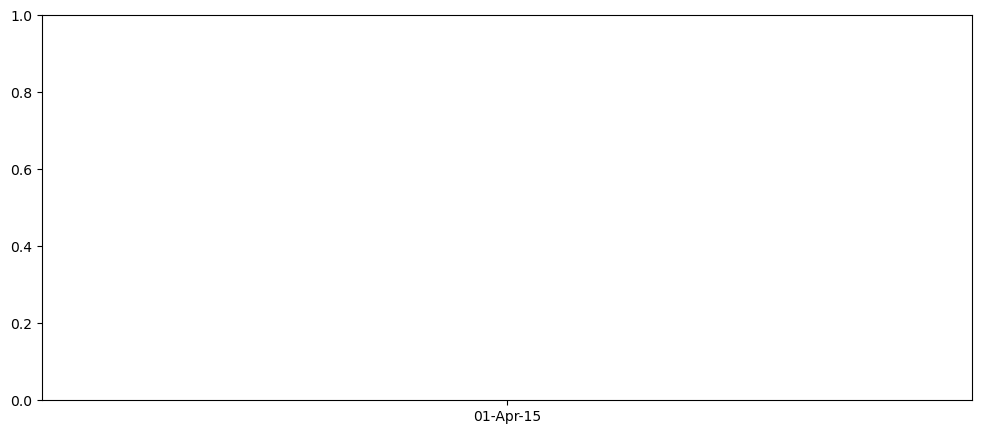

In [58]:
# Plot the time series data
plt.figure(figsize = (12, 5))
plt.plot(Energy_df)
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title('Time series plot of Energy Consumption in UK')
plt.show()

In [22]:


# Plot the time series data
plt.figure(figsize = (12, 5))
plt.plot(Energy_df)
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title('Time series plot of Energy Consumption in UK')
plt.show()

# Plot a histogram to understand the distribution of data
plt.figure(figsize = (12, 5))
sns.histplot(Energy_df['y'], bins = 30)
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Consumption in UK')
plt.show()

# Plot a boxplot to understand the distribution of data
plt.figure(figsize = (12, 5))
sns.boxplot(Energy_df['y'])
plt.xlabel('Energy Consumption')
plt.title('Boxplot of Energy Consumption in UK')
plt.show()

# Decompose the time series data into Trend, Seasonality and Residual
result = seasonal_decompose(Energy_df, model = 'multiplicative')

# Plot the decomposed result
plt.figure(figsize = (12, 8))
result.plot()
plt.show()

# Plot ACF and PACF to determine the values of p and q
plot_acf(Energy_df)
plot_pacf(Energy_df)
plt.show()

# Build ARIMA model
model = ARIMA(Energy_df, order = (2, 1, 2))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot residuals to make sure they are normally distributed
plt.figure(figsize = (12, 5))
plt.plot(model_fit.resid)
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Forecast energy demand for next 12 months
forecast = model_fit.forecast(steps = 12)[0]

# Plot the forecasted values
plt.figure(figsize = (12, 5))
plt.plot(forecast, color = 'red')
pl

ValueError: time data 'Date' does not match format '%d-%b-%y' (match)